# Quantize Model

### Import Packages

In [1]:
!pip install git+https://github.com/aris-gk3/ml_project_util.git

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-1ru_nwnl
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-1ru_nwnl
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit 62c6be5dba2d44b545daa677b6e6d9dcd247920b
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=23354 sha256=b0bbaac82f606a881ca432e8740b5c09932d73df48b19db6e49218672d03d9b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-7_ignni9/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util


In [2]:
import tensorflow as tf
# Local imports
from ml_project_util.path import path_definition
from ml_project_util.flatten_model import flatten_condtitional
from ml_project_util.quantization_util import quant_weights, quant_activations, quant_model, quant_bw_search, model_evaluation_precise

2025-09-23 11:11:58.511492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758625918.732486      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758625918.791114      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Variable Paths, Execution Environments

In [3]:
dict = path_definition(ds_rel_path='uc-merced-21-restructured-and-converted')
# /kaggle/input/uc1_p1_ft/keras/default/1/UC1_P1_FT2_015_val0.1273.keras
dict = path_definition()
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: uc-merced-21-restructured-and-converted


### Load Model

In [4]:
# Two first letters for dataset, next letter stands for parameter
# 3 numbers are for the number of epochs, and the last 4 digits are for validation loss
# e.g. CD4_P2_FT_003_val0.0336
model_name = 'UC1_P1_FT2_015_val0.1273'
# parent_folder = model_name[:3]
# filepath = f'{PATH_SAVEDMODELS}/{parent_folder}/{model_name}.keras'
filepath = '/kaggle/input/uc1_p1_ft/keras/default/1/UC1_P1_FT2_015_val0.1273.keras'
model = tf.keras.models.load_model(filepath)
model = flatten_condtitional(model, model_name)

I0000 00:00:1758625934.228575      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758625934.229271      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


### Quantize & Evaluate

In [5]:
model_evaluation_precise(model)

Found 420 files belonging to 21 classes.
Start evaluating batches
Batch Number: 0

I0000 00:00:1758625938.268765      19 cuda_dnn.cc:529] Loaded cuDNN version 90300


Batch Number: 13
Precise test accuracy: 0.96190
Precise test loss: 0.12592


(0.96190476, 0.12592056242394306)

In [6]:
# qw_model = quant_weights(model, model_name, num_bits=8, mode='quant')
# qwa_model =  quant_activations(model, model_name, num_bits=8, mode='eval', design='hw')

In [7]:
# qwa_model =  quant_model(model, model_name, num_bits=8, mode='eval', design='hw')

In [8]:
# qwa_model = quant_bw_search(model, model_name, range(7,18))

Quantizing model to 7 bits...
Saved json in: /kaggle/working/Docs_Reports/Quant/Ranges/input_range.json
Saved activation ranges in /kaggle/working/Docs_Reports/Quant/Ranges/UC1_P1_FT2_015_activation_range.json
Saved json in: /kaggle/working/Docs_Reports/Quant/Ranges/UC1_P1_FT2_015_wt_range.json
Quantization on arbitrary symmetric ranges is applied.
Read sw activation quantization range from /kaggle/working/Docs_Reports/Quant/Ranges/UC1_P1_FT2_015_activation_range.json.
New model input shape: (None, 224, 224, 3)
Found 420 files belonging to 21 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Start evaluating batches
Batch Number: 13
Precise test accuracy: 0.13333
Precise test loss: 2.88758
Read weight range json from /kaggle/working/Docs_Reports/Quant/Ranges/UC1_P1_FT2_015_wt_range.json
Read activation range json from /kaggle/working/Docs_Reports/Quant/Ranges/UC1_P1_FT2_015_activation_range.json
['input_layer', 'block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'dense', 'dense_1']


Read input range json from /kaggle/working/Docs_Reports/Quant/Ranges/input_range.json
For layer 1.
For layer block1_conv1: k=10, N_i=17
Next input range: {'min': 0.0, 'max': 1100.794189453125}
HW next input range: 1494.113945603282


For layer 2.
For layer block1_conv2: k=10, N_i=17
Next input range: {'min': 0.0, 'max': 4795.75}
HW next input range: 5173.92582681101


For layer 3.
For layer block2_conv1: k=9, N_i=16
Next input range: {'min'

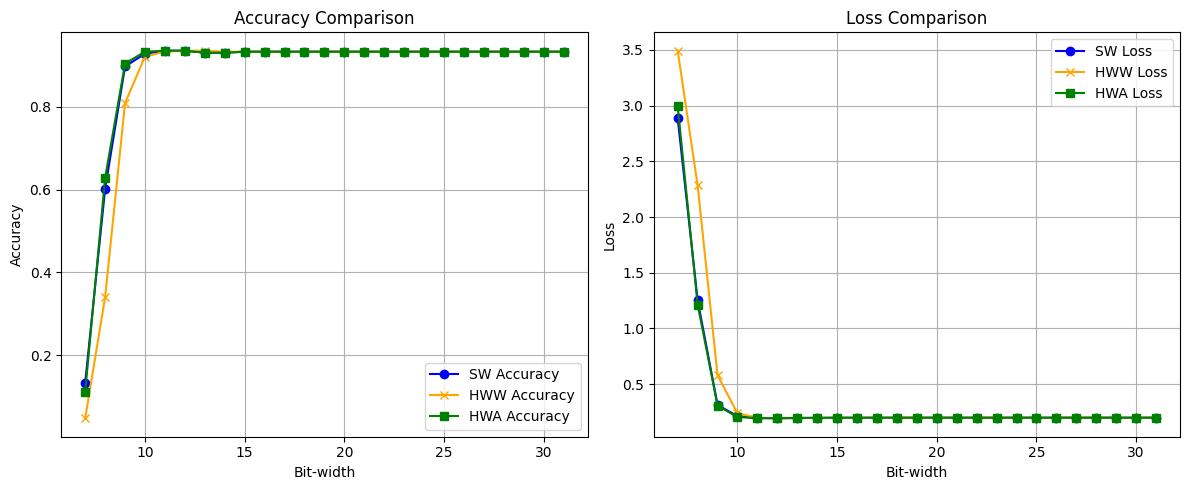

{
    "7b": {
        "accuracy": 0.13333334028720856,
        "loss": 2.8875808806646437
    },
    "8b": {
        "accuracy": 0.6023809313774109,
        "loss": 1.253049806186131
    },
    "9b": {
        "accuracy": 0.8976190686225891,
        "loss": 0.31204331942967006
    },
    "10b": {
        "accuracy": 0.9285714030265808,
        "loss": 0.21168107883561224
    },
    "11b": {
        "accuracy": 0.9357143044471741,
        "loss": 0.19354558615457443
    },
    "12b": {
        "accuracy": 0.9357143044471741,
        "loss": 0.19383950038325218
    },
    "13b": {
        "accuracy": 0.9309523701667786,
        "loss": 0.1957344724131482
    },
    "14b": {
        "accuracy": 0.9309523701667786,
        "loss": 0.19590914093312764
    },
    "15b": {
        "accuracy": 0.9333333373069763,
        "loss": 0.19759058136315572
    },
    "16b": {
        "accuracy": 0.9333333373069763,
        "loss": 0.1972580534716447
    },
    "17b": {
        "accuracy": 0.9333333373

In [9]:
%%time
quant_bw_search(model, model_name, range(7,32))

### Save Metrics

In [10]:
# import json

# # save accuracy in json in
# bitwidth = 8
# mode = "qw"
# short_name = model_name[:-10]
# accuracy_path = f'{BASE_PATH}/Docs_Reports/Quant/{short_name}_acc_bw_{mode}.json'
# # read json
# try:
#     with open(accuracy_path, 'r') as file:
#         acc_bw_dict = json.load(file)
# except:
#     print('No accuracy per bitwidth json file found in specified path!')
#     acc_bw_dict = {}
# # add in dict
# acc_bw_dict[f'{bitwidth}b'] = { "accuracy": 0.97840, "loss": 0.11877}
# # write json
# with open(accuracy_path, 'w') as f:
#     json.dump(acc_bw_dict, f, indent=4)

### Save qw model

In [11]:
# # same path + qw subfolder
# parent_folder = model_name[:3]
# short_name = model_name[:-10]
# model_path = f'{PATH_SAVEDMODELS}/{parent_folder}/Quant/{short_name}_qw.keras'
# model.save(model_path)